In [6]:
import sys
import os
import mdtraj.io as mdio
from msmbuilder.io import save_meta,load_meta
from msmbuilder.dataset import dataset
from msmbuilder.cluster import KCenters
from msmbuilder.cluster import MiniBatchKMeans
from msmbuilder.cluster import MiniBatchKMedoids
from msmbuilder.msm import MarkovStateModel
from msmbuilder.lumping import PCCAPlus
from msmbuilder.lumping import PCCA
from msmbuilder.decomposition import tICA
from msmbuilder.msm import implied_timescales
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import numpy as np
font_path = '/home/disk2/wdd/msm/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=20)

In [2]:
cd /home/dongdong/SCR/msm_pdz/complex/kcenters_micro400lag400_2

/scratch/gpfs/dongdong/msm_pdz/complex/kcenters_micro400lag400_2


In [32]:
trj_information=np.loadtxt('trj_select2.cs')

In [33]:
all_trj=[]
for eachin in trj_information:
    temp_trj=[]
    rmsd=np.loadtxt('/home/dongdong/SCR/msm_pdz/complex/12concentration/rmsd/fit'+str(int(eachin[0]))+'_pdz'+str(int(eachin[1]))+'.rmsd')
    Q=np.loadtxt('/home/dongdong/SCR/msm_pdz/complex/12concentration/Q_heavyatoms/fit'+str(int(eachin[0]))+'_chain'+str(int(eachin[1]))+'_Q_heavyatoms.cs')
    endtrj=int(eachin[2])*10+1
    for i in range(endtrj):
        temp=[]
        temp.append(rmsd[i])
        temp.append(Q[i])
        temp_arr=np.array(temp)
        temp_trj.append(temp_arr)
    temp_trj_arr=np.array(temp_trj)
    all_trj.append(temp_trj_arr)
all_arr=np.array(all_trj)

In [35]:
num_clusters=[400,500,600,700]
lagtime=[400,600]
for nc in num_clusters:
    print nc
    clusterer = KCenters(n_clusters=nc)
    clustered_trajs = clusterer.fit_transform(all_arr)
    for lg in lagtime:
        msm=MarkovStateModel(lag_time=lg,reversible_type='mle', ergodic_cutoff='on',verbose=False)
        msm.fit(clustered_trajs)
        os.chdir('/home/disk2/wdd/PDZ/12concentration_MSM_Q0930/')
        lab_fix=msm.transform(clustered_trajs,mode='fill')
        dirname='kcenters_micro'+str(nc)+'lag'+str(lg)
        os.mkdir(dirname)
        os.chdir(dirname)
        wf=open('Populations.dat','w')
        for h in msm.populations_:
            wf.write(str(h)+'\n')
        wf.close()
        print msm.score(lab_fix)
        matrix = msm.transmat_
        wf=open('matrix.dat','w')
        for h in matrix:
            for l in h:
                wf.write(str(l)+'    ')
            wf.write('\n')
        wf.close()
        save_meta(clustered_trajs,'clustered_trajs.pickl')
        save_meta(msm,'msm.pickl')
        os.system('/home/disk2/wdd/msm_tools/CKtestV5 -msm msm.pickl -clu clustered_trajs.pickl -dt 10 -T 7')

400
13.1455760671
10.9872317889
500
13.3842487371
11.2200173101
600
13.8190359973
11.4847252081
700
14.087316955
11.4479175467


In [72]:
nc=400
clusterer = KCenters(n_clusters=nc,random_state=42)
clustered_trajs = clusterer.fit_transform(all_arr)

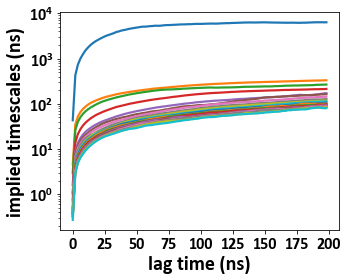

In [79]:
lag_times = np.arange(1,2000,20)
n_timescales = 20
msm_timescales = implied_timescales(clustered_trajs, lag_times, n_timescales=n_timescales, msm=MarkovStateModel(verbose=False), n_jobs = 7)
fig = plt.figure(figsize=(5,4))
sub = fig.add_subplot(1,1,1)
for i in range(n_timescales):
    plt.plot(lag_times*0.1, msm_timescales[:,i]*0.1,lw=2.2)
for label in (sub.get_xticklabels() + sub.get_yticklabels()):
    label.set_fontproperties(font_prop)
    label.set_fontsize(16)
plt.xlabel(r'lag time (ns)',fontproperties=font_prop)
plt.ylabel(r'implied timescales (ns)',fontproperties=font_prop)
#plt.ylim(1,10000)
plt.semilogy()
pngname='impliedtimescales_kcenters2'+'c'+str(nc)
plt.savefig(pngname,dpi=600,bbox_inches='tight')
plt.show()

In [73]:
lg=400
msm=MarkovStateModel(lag_time=lg,reversible_type='mle', ergodic_cutoff='on',verbose=False)
msm.fit(clustered_trajs)
lab_fix=msm.transform(clustered_trajs,mode='fill')

In [75]:
msm=

/home/disk2/wdd/PDZ/12concentration_MSM_Q0930/kcenters_micro400lag400_2


In [76]:
wf=open('cluster_center_kcenters400.cs','w')
for i in range(len(clusterer.cluster_centers_[msm.state_labels_, 0])):
    wf.write(str(clusterer.cluster_centers_[msm.state_labels_, 0][i])+'    '+str(clusterer.cluster_centers_[msm.state_labels_, 1][i])+'\n')
wf.close()

In [49]:
from msmbuilder.lumping import PCCAPlus
pcca = PCCAPlus.from_msm(msm, n_macrostates=20)
macro_trajs = pcca.transform(clustered_trajs)

Optimization terminated successfully.
         Current function value: -6.036150
         Iterations: 36
         Function evaluations: 2210


In [45]:
pcca.microstate_mapping_

array([3, 2, 1, 0, 2, 3, 2, 3, 3, 1, 3, 3, 2, 3, 3, 1, 3, 3, 2, 3, 0, 3, 2,
       2, 1, 3, 3, 1, 3, 3, 1, 2, 2, 2, 1, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3,
       3, 3, 2, 1, 0, 2, 1, 3, 3, 0, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 3, 1, 2,
       1, 3, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 2, 1, 1, 2, 1, 3, 3, 3, 3, 1,
       2, 1, 2, 3, 3, 3, 1, 3, 2, 3, 3, 3, 0, 2, 2, 2, 0, 1, 0, 3, 3, 2, 1,
       1, 2, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 1, 3, 3, 3, 3, 3,
       3, 0, 2, 2, 1, 3, 0, 1, 3, 3, 3, 3, 1, 3, 2, 2, 3, 2, 1, 2, 3, 2, 2,
       3, 1, 3, 2, 0, 3, 1, 0, 3, 3, 3, 1, 2, 2, 3, 0, 3, 3, 1, 3, 3, 2, 1,
       2, 3, 0, 3, 2, 2, 0, 2, 2, 1, 1, 2, 3, 0, 1, 1, 3, 2, 3, 2, 3, 3, 3,
       1, 3, 3, 3, 1, 1, 2, 3, 3, 3, 2, 3, 1, 3, 2, 0, 3, 0, 3, 3, 3, 2, 3,
       0, 1, 3, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 0, 0, 3, 3, 1, 3, 3, 3,
       1, 3, 3, 2, 2, 1, 1, 3, 2, 3, 2, 2, 3, 2, 3, 1, 2, 3, 3, 1, 3, 2, 3,
       2, 2, 2, 0, 2, 3, 2, 3, 1, 2, 3, 3, 0, 3, 3, 0, 2, 2, 3, 3, 2, 2, 2,
       3, 3,

In [50]:
wf=open('pcca20micro.cs','w')
for aa in pcca.microstate_mapping_:
    wf.write(str(aa)+'\n')
wf.close()

In [18]:
len(all_arr[0][0])

2

In [77]:
wf=open('Populations.dat','w')
for h in msm.populations_:
    wf.write(str(h)+'\n')
wf.close()
print msm.score(lab_fix)
matrix = msm.transmat_
wf=open('matrix.dat','w')
for h in matrix:
    for l in h:
        wf.write(str(l)+'    ')
    wf.write('\n')
wf.close()
save_meta(clustered_trajs,'clustered_trajs.pickl')
save_meta(msm,'msm.pickl')
os.system('/home/disk2/wdd/msm_tools/CKtestV5 -msm msm.pickl -clu clustered_trajs.pickl -dt 10 -T 6')

13.1231745382


0

In [23]:
pwd

'/scratch/gpfs/dongdong/msm_pdz/complex/kcenters_micro400lag400_2'

In [74]:
msm.populations_

array([  1.00545144e-01,   2.00255992e-03,   6.59821606e-06,
         9.58951731e-06,   2.85335288e-06,   2.13773981e-06,
         3.10537903e-06,   2.57194350e-02,   2.29977415e-04,
         1.01358082e-03,   1.30047832e-04,   1.37929813e-04,
         4.69543646e-03,   1.24744185e-05,   4.01955143e-04,
         4.31647706e-07,   2.65756641e-04,   8.72706512e-06,
         1.28488971e-03,   9.47849488e-05,   2.97048235e-04,
         5.44884196e-06,   3.56056465e-04,   5.59670598e-06,
         1.08927487e-04,   1.40357029e-03,   1.17208456e-05,
         1.65661312e-06,   7.33068814e-06,   1.97137183e-04,
         1.23140493e-04,   1.45158418e-06,   8.75887165e-04,
         3.80116650e-05,   6.21618654e-06,   1.65642663e-03,
         7.48276082e-06,   1.66446911e-04,   2.00483645e-04,
         3.49779405e-04,   4.02120222e-05,   2.82863929e-04,
         1.00007008e-04,   3.40953864e-04,   1.10776786e-04,
         2.51832640e-05,   1.81267467e-03,   1.19489362e-04,
         3.33968064e-04,

In [7]:
from msmbuilder.io import save_meta,load_meta

In [26]:
cd ..

/scratch/gpfs/dongdong/msm_pdz/complex/kcenters_micro400lag400_2


In [27]:
msm=load_meta('msm.pickl')

In [28]:
clustered_trajs=load_meta('clustered_trajs.pickl')
lab_fix=msm.transform(clustered_trajs,mode='fill')

In [10]:
from msmbuilder.lumping import PCCAPlus
pcca = PCCAPlus.from_msm(msm, n_macrostates=6)
macro_trajs = pcca.transform(lab_fix)

Optimization terminated successfully.
         Current function value: -4.331730
         Iterations: 17
         Function evaluations: 254


In [11]:
wf=open('pcca6micro.cs','w')
for aa in pcca.microstate_mapping_:
    wf.write(str(aa)+'\n')
wf.close()

In [29]:
sample = msm.draw_samples(lab_fix,1000)

In [11]:
lg=400
msm=MarkovStateModel(lag_time=lg,reversible_type='mle', ergodic_cutoff='on',verbose=False)
msm.fit(clustered_trajs)
lab_fix=msm.transform(clustered_trajs,mode='fill')

In [9]:
from msmbuilder.lumping import PCCAPlus
pcca = PCCAPlus.from_msm(msm, n_macrostates=10)
macro_trajs = pcca.transform(clustered_trajs)

Optimization terminated successfully.
         Current function value: -5.324759
         Iterations: 27
         Function evaluations: 606


In [10]:
wf=open('pcca10micro.cs','w')
for aa in pcca.microstate_mapping_:
    wf.write(str(aa)+'\n')
wf.close()

In [14]:
sample = msm.draw_samples(lab_fix,1000)

In [118]:
len(sample)

400

In [31]:
all_arr[290]

array([[  2.21492000e-01,   1.33358241e-35],
       [  2.32242000e-01,   4.55115574e-33],
       [  2.57702000e-01,   1.33143912e-31],
       ..., 
       [  9.89585000e-02,   6.95901413e-21],
       [  1.01193000e-01,   5.88289244e-23],
       [  8.93138000e-02,   9.16409851e-22]])

In [21]:
all_sample=[]
allH=np.zeros((100,100))
for i in range(len(sample)):
    temp=[]
    pop=msm.populations_[i]
    for j in range(len(sample[i])):
        temp.append(all_arr[sample[i][j][0]][sample[i][j][1]])
    temp_arr=np.array(temp)
    H, xedges, yedges = np.histogram2d(temp_arr[:,0], temp_arr[:,1], bins=[100,100],range=[[0, 0.45], [0, 1]])
    allH+=H*pop

In [34]:
all_sample=[]
allH=np.zeros(100)
for i in range(len(sample)):
    temp=[]
    pop=msm.populations_[i]
    for j in range(len(sample[i])):
        temp.append(all_arr[sample[i][j][0]][sample[i][j][1]])
    temp_arr=np.array(temp)
    H, xedges = np.histogram(temp_arr[:,1], bins=100,range=[0, 1])
    allH+=H*pop

In [20]:
allH=np.zeros(100)

In [38]:
-np.log(allH)*0.5917

array([-3.89133311, -1.21125083, -1.00874408, -0.89783798, -0.78600228,
       -0.61297924, -0.57826839, -0.48119805, -0.35951105, -0.31546218,
       -0.28209363, -0.27535087, -0.32126985, -0.33240151, -0.32758644,
       -0.29555073, -0.30548611, -0.27080564, -0.24056301, -0.19055651,
       -0.09318052, -0.02874524, -0.02438794,  0.01420846,  0.03500451,
        0.0711531 ,  0.12690614,  0.17355286,  0.17550962,  0.23123901,
        0.31005819,  0.3617097 ,  0.39197255,  0.36371719,  0.3705696 ,
        0.33418462,  0.35478889,  0.47480895,  0.53537146,  0.53964971,
        0.54849173,  0.57903422,  0.58549897,  0.60217196,  0.56109701,
        0.55277619,  0.55484763,  0.58283077,  0.55315039,  0.59854229,
        0.60542731,  0.64607062,  0.70779585,  0.79219359,  0.85217301,
        0.83030369,  0.79300996,  0.87358787,  0.90106927,  0.8692651 ,
        0.78004454,  0.67336069,  0.58517629,  0.50502562,  0.44388189,
        0.39411506,  0.33917226,  0.31610753,  0.19848563,  0.02

No handles with labels found to put in legend.


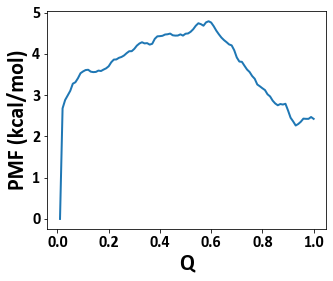

In [40]:
from matplotlib.colors import LogNorm
import numpy as np
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
font_path = '/home/dongdong/tigress/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=22)
leg_prop = font_manager.FontProperties(fname=font_path, size=18)
fig = plt.figure(figsize=(5,4))
sub = fig.add_subplot(1,1,1)
en = -np.log(allH)*0.5917
en=en-np.min(en)
plt.plot(xedges[1:], en,lw=2)

for label in (sub.get_xticklabels() + sub.get_yticklabels()):
    label.set_fontproperties(font_prop)
    label.set_fontsize(16)
plt.xlabel(r'Q',fontproperties=font_prop)
plt.ylabel(r'PMF (kcal/mol)',fontproperties=font_prop)
#plt.ylim(-20,20)
#plt.xlim(180,260)
leg=sub.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
leg.get_frame().set_linewidth(0.0)
leg.get_frame().set_alpha(0.1)
#plt.semilogy()
plt.savefig('1DPMF.png',dpi=600,bbox_inches='tight')
plt.show()

In [44]:
for i in range(len(en)):
    print(str(en[i])+'    '+str(xedges[i+1]))

0.0    0.01
2.6800822815    0.02
2.88258902686    0.03
2.99349513049    0.04
3.10533082288    0.05
3.27835386417    0.06
3.31306471531    0.07
3.41013505288    0.08
3.53182206008    0.09
3.57587092957    0.1
3.60923948108    0.11
3.61598223441    0.12
3.57006325704    0.13
3.55893159567    0.14
3.56374666193    0.15
3.59578237247    0.16
3.58584699736    0.17
3.62052746646    0.18
3.65077009202    0.19
3.70077659529    0.2
3.79815258898    0.21
3.86258786573    0.22
3.86694517148    0.23
3.90554156592    0.24
3.92633761565    0.25
3.96248620152    0.26
4.01823924705    0.27
4.06488596924    0.28
4.06684272459    0.29
4.12257211914    0.3
4.20139129531    0.31
4.25304281099    0.32
4.28330565973    0.33
4.25505029561    0.34
4.26190270617    0.35
4.2255177283    0.36
4.24612199367    0.37
4.3661420605    0.38
4.42670456795    0.39
4.43098282131    0.4
4.43982483867    0.41
4.47036733009    0.42
4.47683208051    0.43
4.49350506636    0.44
4.45243011815    0.45
4.44410929799    0.46
4.446

In [43]:
en[1]

2.680082281501496

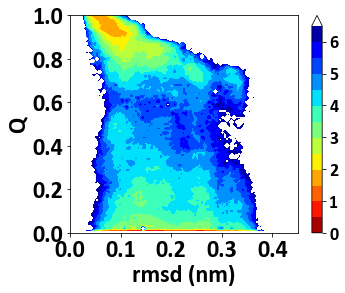

In [22]:
from matplotlib.colors import LogNorm
import numpy as np
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
font_path = '/home/dongdong/tigress/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=24)
leg_prop = font_manager.FontProperties(fname=font_path, size=18)

H = allH.T
denname = 'pmf.cs'
wf = open(denname,'w')
wf.write('#x    y     z\n')
for i in range(len(H)):
    for j in range(len(H[i])):
        if H[i][j]==0:
            en =10
        else:
            en = -np.log(H[i][j])*0.5917
        wf.write(str(en)+"    ")
    wf.write("\n")
wf.close()
HH = np.loadtxt(denname)
Hn = HH - np.amin(HH)

#xedges=np.linspace(0, 0.45, num=100)
#yedges=np.linspace(0, 1, num=100)
#Hn=np.loadtxt('pmf.cs')
fig = plt.figure(figsize=(5.1, 4))
ax = fig.add_subplot(111)
cmap = plt.cm.get_cmap("jet_r")
#CS = plt.contourf(xedges[1:],yedges[1:],H,levels = np.linspace(0,1000000,11),cmap=cmap,extend="max")
#lvls = np.logspace(0,3,15)
cmap.set_over("white")
CS = plt.contourf(xedges[1:],yedges[1:],Hn,levels = np.linspace(0,6.5,14),cmap=cmap,extend="max")
cbar = plt.colorbar(CS)
#plt.scatter(data_ave[:,0],data_ave[:,1],s=18)
#plt.scatter(data_ave[:,0],data_ave[:,1],c=pcca,cmap='tab20c',s=14)
#plt.errorbar(data_ave[:,2],data_ave[:,0],xerr=data_ave[:,3],yerr=data_ave[:,1],fmt=None)
plt.xlabel(r'rmsd (nm)',fontproperties=font_prop)
plt.ylabel(r'Q',fontproperties=font_prop)
plt.xlim(0,0.45)
plt.ylim(0,1)
#leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
#leg.get_frame().set_linewidth(0.0)
#leg.get_frame().set_alpha(0.1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()+cbar.ax.get_yticklabels()):
    label.set_fontproperties(font_prop)
for label in cbar.ax.get_yticklabels():
    label.set_fontproperties(leg_prop)
plt.savefig('/home/dongdong/SCR/msm_pdz/complex/kcenters_micro400lag400_2/test.png',dpi=600,bbox_inches='tight')
    #label.set_fontsize(16)
#plt.imshow(HH, interpolation='nearest', origin='low',extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],levels = np.linspace(1,6,20))
plt.show()


In [33]:
Ms=4
from msmbuilder.lumping import PCCAPlus
pcca = PCCAPlus.from_msm(msm, n_macrostates=Ms)
macro_trajs = pcca.transform(lab_fix)
wf=open('pcca'+str(Ms)+'micro.cs','w')
for aa in pcca.microstate_mapping_:
    wf.write(str(aa)+'\n')
wf.close()

Optimization terminated successfully.
         Current function value: -3.363999
         Iterations: 31
         Function evaluations: 128


In [15]:
len(Hn)

100

aa

In [166]:
import matplotlib as mpl
cmap2 = mpl.colors.ListedColormap(['c','orange','magenta','green','y','greenyellow','grey','royalblue','red','purple','blue'])
for Ms in range(10,11):

    pcca = PCCAPlus.from_msm(msm, n_macrostates=Ms)
    macro_trajs = pcca.transform(lab_fix)
    wf=open('pcca'+str(Ms)+'micro.cs','w')
    for aa in pcca.microstate_mapping_:
        wf.write(str(aa)+'\n')
    wf.close()
    pcca=np.loadtxt('pcca'+str(Ms)+'micro.cs')
    centers=np.loadtxt('cluster_center_kcenters400.cs')
    
    fig = plt.figure(figsize=(5.1, 4))
    ax = fig.add_subplot(111)
    cmap = plt.cm.get_cmap("jet_r")
    #CS = plt.contourf(xedges[1:],yedges[1:],H,levels = np.linspace(0,1000000,11),cmap=cmap,extend="max")
    #lvls = np.logspace(0,3,15)
    cmap.set_over("white")
    CS = plt.contourf(xedges[1:],yedges[1:],Hn,levels = np.linspace(0,6.5,14),cmap=cmap,extend="max",alpha=0.1)
    cbar = plt.colorbar(CS)

    plt.scatter(centers[:,0],centers[:,1],
                s=20,
                c=pcca,cmap=cmap2,
                zorder=3
               )
    #plt.scatter(data_ave[:,0],data_ave[:,1],s=18)
    #plt.scatter(data_ave[:,0],data_ave[:,1],c=pcca,cmap='tab20c',s=14)
    #plt.errorbar(data_ave[:,2],data_ave[:,0],xerr=data_ave[:,3],yerr=data_ave[:,1],fmt=None)
    plt.xlabel(r'rmsd (nm)',fontproperties=font_prop)
    plt.ylabel(r'Q',fontproperties=font_prop)
    plt.xlim(0,0.45)
    plt.ylim(0,1)
    #leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
    #leg.get_frame().set_linewidth(0.0)
    #leg.get_frame().set_alpha(0.1)
    for label in (ax.get_xticklabels() + ax.get_yticklabels()+cbar.ax.get_yticklabels()):
        label.set_fontproperties(font_prop)
    for label in cbar.ax.get_yticklabels():
        label.set_fontproperties(leg_prop)
    plt.savefig('/home/dongdong/SCR/msm_pdz/complex/kcenters_micro400lag400_2/pmf_map%d.png' %Ms,dpi=600,bbox_inches='tight')
        #label.set_fontsize(16)
    #plt.imshow(HH, interpolation='nearest', origin='low',extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],levels = np.linspace(1,6,20))
    plt.show()
    

AttributeError: module 'pyemma.msm' has no attribute 'get_params'

In [1]:
cd /scratch/gpfs/dongdong/msm_pdz/complex/kcenters_micro400lag400_2

/scratch/gpfs/dongdong/msm_pdz/complex/kcenters_micro400lag400_2


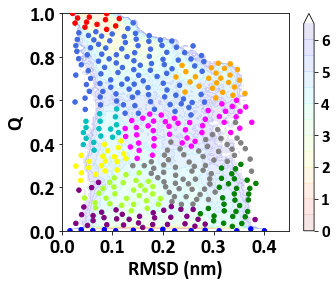

In [16]:
import matplotlib as mpl
from matplotlib.colors import LogNorm
import numpy as np
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
font_path = '/home/dongdong/tigress/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=24)
leg_prop = font_manager.FontProperties(fname=font_path, size=17)

H = allH.T
denname = 'pmf.cs'
wf = open(denname,'w')
wf.write('#x    y     z\n')
for i in range(len(H)):
    for j in range(len(H[i])):
        if H[i][j]==0:
            en =10
        else:
            en = -np.log(H[i][j])*0.5917
        wf.write(str(en)+"    ")
    wf.write("\n")
wf.close()
HH = np.loadtxt(denname)
Hn = HH - np.amin(HH)

cmap2 = mpl.colors.ListedColormap(['c','yellow','magenta','green','orange','greenyellow','grey','royalblue','red','purple','blue'])
Ms=10
pcca=np.loadtxt('pcca'+str(Ms)+'micro_edit.cs')
centers=np.loadtxt('cluster_center_kcenters400.cs')

fig = plt.figure(figsize=(5.1, 4))
ax = fig.add_subplot(111)
cmap = plt.cm.get_cmap("jet_r")
#CS = plt.contourf(xedges[1:],yedges[1:],H,levels = np.linspace(0,1000000,11),cmap=cmap,extend="max")
#lvls = np.logspace(0,3,15)
cmap.set_over("white")
CS = plt.contourf(xedges[1:],yedges[1:],Hn,levels = np.linspace(0,6.5,14),cmap=cmap,extend="max",alpha=0.1)
cbar = plt.colorbar(CS)

plt.scatter(centers[:,0],centers[:,1],
            s=20,
            c=pcca,cmap=cmap2,
            zorder=3
           )
#plt.scatter(data_ave[:,0],data_ave[:,1],s=18)
#plt.scatter(data_ave[:,0],data_ave[:,1],c=pcca,cmap='tab20c',s=14)
#plt.errorbar(data_ave[:,2],data_ave[:,0],xerr=data_ave[:,3],yerr=data_ave[:,1],fmt=None)
plt.xlabel(r'RMSD (nm)',fontproperties=font_prop)
plt.ylabel(r'Q',fontproperties=font_prop)
plt.xlim(0,0.45)
plt.ylim(0,1)
#leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
#leg.get_frame().set_linewidth(0.0)
#leg.get_frame().set_alpha(0.1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()+cbar.ax.get_yticklabels()):
    label.set_fontproperties(font_prop)
for label in cbar.ax.get_yticklabels():
    label.set_fontproperties(leg_prop)
plt.savefig('/home/dongdong/SCR/msm_pdz/complex/kcenters_micro400lag400_2/pmf_map%d.png' %Ms,dpi=600,bbox_inches='tight')
    #label.set_fontsize(16)
#plt.imshow(HH, interpolation='nearest', origin='low',extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],levels = np.linspace(1,6,20))
plt.show()

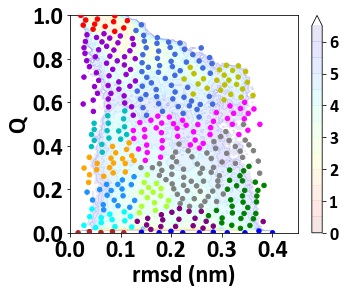

In [167]:
cmap2 = mpl.colors.ListedColormap(['c','orange','magenta','green','y','greenyellow','grey','royalblue','red','purple','blue','firebrick','cyan','dodgerblue','darkviolet'])
Ms=10
pcca=np.loadtxt('pcca_edit2.dat')
centers=np.loadtxt('cluster_center_kcenters400.cs')

fig = plt.figure(figsize=(5.1, 4))
ax = fig.add_subplot(111)
cmap = plt.cm.get_cmap("jet_r")
#CS = plt.contourf(xedges[1:],yedges[1:],H,levels = np.linspace(0,1000000,11),cmap=cmap,extend="max")
#lvls = np.logspace(0,3,15)
cmap.set_over("white")
CS = plt.contourf(xedges[1:],yedges[1:],Hn,levels = np.linspace(0,6.5,14),cmap=cmap,extend="max",alpha=0.1)
cbar = plt.colorbar(CS)

plt.scatter(centers[:,0],centers[:,1],
            s=20,
            c=pcca,cmap=cmap2,
            zorder=3
           )
#plt.scatter(data_ave[:,0],data_ave[:,1],s=18)
#plt.scatter(data_ave[:,0],data_ave[:,1],c=pcca,cmap='tab20c',s=14)
#plt.errorbar(data_ave[:,2],data_ave[:,0],xerr=data_ave[:,3],yerr=data_ave[:,1],fmt=None)
plt.xlabel(r'rmsd (nm)',fontproperties=font_prop)
plt.ylabel(r'Q',fontproperties=font_prop)
plt.xlim(0,0.45)
plt.ylim(0,1)
#leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
#leg.get_frame().set_linewidth(0.0)
#leg.get_frame().set_alpha(0.1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()+cbar.ax.get_yticklabels()):
    label.set_fontproperties(font_prop)
for label in cbar.ax.get_yticklabels():
    label.set_fontproperties(leg_prop)
plt.savefig('/home/dongdong/SCR/msm_pdz/complex/kcenters_micro400lag400_2/pmf_map_edit.png',dpi=600,bbox_inches='tight')
    #label.set_fontsize(16)
#plt.imshow(HH, interpolation='nearest', origin='low',extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],levels = np.linspace(1,6,20))
plt.show()

In [46]:
pcca=np.loadtxt('pcca_edit2.dat')
pcca=pcca.astype(int)
all_idx=[]
for ai in range(15):
    temp=[i for i,x in enumerate(pcca) if x==ai]
    all_idx.append(np.array(temp))

In [78]:
all_idx

[array([ 28,  64,  65,  66, 123, 140, 166, 176, 191, 193, 215, 266, 268,
        337, 344, 368, 380]),
 array([  3,  21,  50,  62,  77,  89, 120, 131, 152, 165, 169, 223, 233,
        251, 291, 293, 325, 371, 379, 398]),
 array([  2,  10,  19,  29,  53,  60,  61,  63,  78,  92, 112, 116, 125,
        132, 147, 150, 159, 162, 167, 171, 189, 192, 194, 199, 203, 204,
        206, 207, 211, 244, 249, 279, 283, 318, 323, 328, 342, 348, 364,
        372, 374, 382, 385, 392, 397]),
 array([  4,  26,  40,  48,  76,  80,  87, 103, 137, 141, 153, 164, 174,
        212, 227, 232, 241, 254, 256, 257, 286, 294, 300, 329, 336, 352,
        353, 354, 366, 388, 389]),
 array([ 13,  23,  42,  90,  95, 100, 110, 115, 142, 146, 208, 218, 239,
        250, 255, 290, 292, 296, 299, 309, 321, 326, 330, 334, 358]),
 array([  9,  32,  82, 109, 126, 179, 198, 200, 242, 260, 270, 287, 313,
        317, 378]),
 array([  8,  14,  15,  20,  22,  31,  41,  43,  44,  45,  55,  58,  72,
         73,  88,  93,  97, 10

In [116]:
wf=open('pcca_edit2.dat','w')
for ii in range(len(pcca)):
    if pcca[ii]==10 and centers[ii][0]<0.13:
        wf.write(str(11)+'\n')
    elif pcca[ii]==9 and centers[ii][0]<0.13:
        wf.write(str(12)+'\n')
    elif pcca[ii]==5 and centers[ii][0]<0.13:
        wf.write(str(13)+'\n')
    elif pcca[ii]==7 and centers[ii][0]<0.13:
        wf.write(str(14)+'\n')
    else:
        wf.write(str(pcca[ii])+'\n')
wf.close()

In [48]:
pcca=pcca.astype(int)

In [49]:
pcca

array([11,  8,  2,  1,  3, 14,  7, 10,  6,  5,  2,  7, 14,  4,  6,  6,  7,
       12,  7,  2,  6,  1,  6,  4,  7,  9,  3, 14,  0,  2,  7,  6,  5, 14,
       11,  7, 10, 14,  7, 14,  3,  6,  4,  6,  6,  6, 14, 13,  3,  7,  1,
       13,  8,  2, 14,  6, 12,  9,  6, 14,  2,  2,  1,  2,  0,  0,  0,  7,
        7, 14,  7,  7,  6,  6,  7,  9,  3,  1,  2, 14,  3, 10,  5,  7,  9,
       13,  8,  3,  6,  1,  4, 14,  2,  6, 14,  4,  7,  6, 14, 12,  4,  6,
       14,  3,  7,  7,  7, 11,  7,  5,  4, 14,  2,  8, 10,  4,  2,  6,  6,
        6,  1, 12, 13,  0,  7,  2,  5,  9, 13,  6, 13,  1,  2,  6, 14,  9,
        7,  3,  6,  7,  0,  3,  4,  6,  8, 14,  4,  2,  7,  6,  2,  8,  1,
        3,  6,  6,  6, 13,  7,  2, 14,  7,  2,  6,  3,  1,  0,  2, 13,  1,
       12,  2, 14, 14,  3,  6,  0,  7,  7,  5,  7, 12,  6,  7,  6, 10, 10,
        7,  9,  2,  7,  0,  2,  0,  2, 14,  9, 14,  5,  2,  5,  7,  8,  2,
        2,  7,  2,  2,  4, 14, 12,  2,  3, 10, 14,  0,  7,  7,  4,  9,  7,
        9, 14,  1,  6, 14

In [50]:
import pyemma.msm as msm
msm_lag = 400
m400_mlh=msm.estimate_markov_model(clustered_trajs, msm_lag)

In [51]:
m400_mlh.pi

array([  1.00544985e-01,   2.00257258e-03,   6.59822239e-06,
         9.58950739e-06,   2.85334871e-06,   2.13773847e-06,
         3.10539775e-06,   2.57193943e-02,   2.29977138e-04,
         1.01357945e-03,   1.30047726e-04,   1.37930084e-04,
         4.69546437e-03,   1.24744438e-05,   4.01954552e-04,
         4.31647073e-07,   2.65758137e-04,   8.72705194e-06,
         1.28489678e-03,   9.47849306e-05,   2.97047831e-04,
         5.44883568e-06,   3.56056017e-04,   5.59671174e-06,
         1.08927662e-04,   1.40356810e-03,   1.17208278e-05,
         1.65661204e-06,   7.33068199e-06,   1.97136988e-04,
         1.23140716e-04,   1.45158294e-06,   8.75885901e-04,
         3.80118851e-05,   6.21617666e-06,   1.65643636e-03,
         7.48274909e-06,   1.66447928e-04,   2.00484138e-04,
         3.49780972e-04,   4.02119658e-05,   2.82863568e-04,
         1.00007182e-04,   3.40953397e-04,   1.10776628e-04,
         2.51832502e-05,   1.81268484e-03,   1.19489192e-04,
         3.33967551e-04,

In [76]:
tpt?

In [169]:
m400_mlh.

In [155]:
M15=msm.estimate_markov_model(pcca_trj,msm_lag)

In [52]:
s11_10=np.array(list(all_idx[11])+list(all_idx[10]))

In [53]:
from pyemma.msm import tpt
tpt1=tpt(m400_mlh,s11_10,all_idx[8])

In [77]:
tpt11_12=tpt(m400_mlh,all_idx[11],all_idx[12])
tpt11_12.rate

1.4560030867328021e-05

In [75]:
tpt10_9=tpt(m400_mlh,all_idx[10],all_idx[9])
tpt10_9.mfpt

12501.714282971723

In [321]:
tpt11_8=tpt(m400_mlh,all_idx[11],all_idx[8])
tpt11_8.mfpt

214894.59641212609

In [322]:
tpt10_8=tpt(m400_mlh,all_idx[10],all_idx[8])
tpt10_8.mfpt

214886.08580315943

In [327]:
tpt00_8=tpt(m400_mlh,[320],all_idx[8])
tpt00_8.mfpt

214886.97036264854

In [92]:
tpt14_8=tpt(m400_mlh,all_idx[11],all_idx[11])
print(tpt14_8.mfpt/10000)
print(tpt14_8.rate*10000)

ValueError: Sets A and B have to be disjoint

In [87]:
allrate=np.zeros([15,15])

In [108]:
allrate=np.zeros([15,15])
leg=[2,3,4,5,6,7,8,9,14,10,0,1,11,12,13]
for i in range(15):
    for j in range(15):
        if i!=j:
            temp_tpt=tpt(m400_mlh,all_idx[i],all_idx[j])
            allrate[leg[i]][leg[j]]=temp_tpt.rate*10000
            if leg[i]==0 or leg[i]==1:
                allrate[leg[i]][leg[j]]=temp_tpt.rate*10000*12/0.0392
            if (leg[i]==0 and leg[j]==1) or (leg[i]==1 and leg[j]==0):
                allrate[leg[i]][leg[j]]=temp_tpt.rate*10000

In [94]:
allrate

array([[  0.00000000e+00,   1.11499751e+03,   6.40179969e+00,
          1.04849165e+01,   1.64883591e+01,   2.19572625e+01,
          7.38215981e+00,   3.83224047e+01,   3.81637466e+01,
          1.65738202e+01,   2.44864378e+02,   4.44838891e+01,
          2.75983762e+01,   1.60582508e+01,   1.42458013e+01],
       [  3.76698895e+03,   0.00000000e+00,   6.40229090e+00,
          1.04860488e+01,   1.64893335e+01,   2.19304926e+01,
          7.38155570e+00,   3.83209561e+01,   3.81474219e+01,
          1.65727764e+01,   2.43718834e+02,   4.45715231e+01,
          2.76140954e+01,   1.60579008e+01,   1.42452372e+01],
       [  5.42303396e-01,   4.91744073e-01,   0.00000000e+00,
          6.68168909e-02,   7.74989740e-02,   6.69262438e-02,
          2.67790553e-02,   1.46062675e-01,   1.48267042e-01,
          7.48678263e-02,   3.61965542e-01,   1.25174109e-01,
          1.12869099e-01,   7.65268588e-02,   6.19653774e-02],
       [  7.21742012e-01,   6.34679098e-01,   3.12076648e-02,
     

In [55]:
cg, cgflux = tpt1.coarse_grain(all_idx)

In [56]:
cg

[OrderedSet([7, 36, 81, 114, 185, 186, 213, 265, 267, 320]),
 OrderedSet([0, 34, 107, 361, 373]),
 OrderedSet([28, 64, 65, 66, 123, 140, 166, 176, 191, 193, 215, 266, 268, 337, 344, 368, 380]),
 OrderedSet([3, 21, 50, 62, 77, 89, 120, 131, 152, 165, 169, 223, 233, 251, 291, 293, 325, 371, 379, 398]),
 OrderedSet([2, 10, 19, 29, 53, 60, 61, 63, 78, 92, 112, 116, 125, 132, 147, 150, 159, 162, 167, 171, 189, 192, 194, 199, 203, 204, 206, 207, 211, 244, 249, 279, 283, 318, 323, 328, 342, 348, 364, 372, 374, 382, 385, 392, 397]),
 OrderedSet([4, 26, 40, 48, 76, 80, 87, 103, 137, 141, 153, 164, 174, 212, 227, 232, 241, 254, 256, 257, 286, 294, 300, 329, 336, 352, 353, 354, 366, 388, 389]),
 OrderedSet([13, 23, 42, 90, 95, 100, 110, 115, 142, 146, 208, 218, 239, 250, 255, 290, 292, 296, 299, 309, 321, 326, 330, 334, 358]),
 OrderedSet([9, 32, 82, 109, 126, 179, 198, 200, 242, 260, 270, 287, 313, 317, 378]),
 OrderedSet([8, 14, 15, 20, 22, 31, 41, 43, 44, 45, 55, 58, 72, 73, 88, 93, 97, 101, 1

In [57]:
cgflux.stationary_distribution

array([ 0.54246238,  0.16166861,  0.00256559,  0.00270432,  0.00369487,
        0.00445488,  0.00469875,  0.00908248,  0.01076674,  0.03317715,
        0.03620636,  0.00731829,  0.00562715,  0.07863081,  0.0969416 ])

In [58]:
paths, path_fluxes = cgflux.pathways(fraction=1)

In [96]:
cgflux.pathways?

In [69]:
tpt1.

array([[  0.00000000e+00,   0.00000000e+00,   1.28203571e-10, ...,
          5.92027968e-10,   1.82348241e-09,   1.99997148e-09],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          6.74524006e-11,   1.56164942e-10,   0.00000000e+00]])

In [134]:
set(paths)

TypeError: unhashable type: 'numpy.ndarray'

In [138]:
print ('percentage       \tpath')
print ('-------------------------------------')
for i in range(len(paths)):
    print (path_fluxes[i] / np.sum(path_fluxes),' \t', paths[i])

percentage       	path
-------------------------------------
0.10415090541  	 [ 0  9 14]
0.0746018322631  	 [ 0  8  9 13 14]
0.066542380081  	 [ 0 13 14]
0.0530431675529  	 [ 0  4  9 14]
0.0399377216145  	 [ 0  7 13 14]
0.0388270517677  	 [ 0  7  9 13 14]
0.0367190426822  	 [ 0  8 13 14]
0.0342706586334  	 [ 0 10  8  4 13 14]
0.0314316758312  	 [ 0 12  9 14]
0.0272832157334  	 [ 0 10  7  4 13 14]
0.0263294191002  	 [ 1 13 14]
0.0255432712252  	 [ 1  9 13 14]
0.0251301721164  	 [ 0  3 13 14]
0.0251216628204  	 [ 1  8 13 14]
0.0250370295566  	 [ 0 10  9 14]
0.0241382056927  	 [ 0  6  9 13 14]
0.0237056328864  	 [ 0 12 13 14]
0.0228355876782  	 [ 0 14]
0.0185661345252  	 [ 0 10  4  9 14]
0.0179551159321  	 [ 1 10 13 14]
0.0171553304088  	 [ 1  4  6 13 14]
0.0155547938594  	 [ 1 12  4 14]
0.0143074563221  	 [ 0  5  8  6  9 14]
0.0140130864087  	 [ 0 11  9 13 14]
0.0134705146151  	 [ 0 10 12  3  9 14]
0.0132640554484  	 [ 1  7  8 14]
0.0118124715695  	 [ 0  5  9 13 14]
0.0113738364985  	 [ 

In [59]:
Fsub = tpt1.major_flux(fraction=1)
Fsubpercent = 100.0 * Fsub / tpt1.total_flux

/home/dongdong/software/anaconda3/envs/py3.6/lib/python3.6/site-packages/msmtools/flux/sparse/pathways.py:317: RuntimeWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", RuntimeWarning)


In [93]:
len(Fsub)

400

In [60]:
def avg_by_set(x, sets):
    # compute mean positions of sets. This is important because of some technical points the set order
    # in the coarse-grained TPT object can be different from the input order.
    avg = np.zeros(len(sets))
    for i in range(len(sets)):
        I = list(sets[i])
        avg[i] = np.mean(x[I])
    return avg
cc_x=centers[:,0]*2.8
cc_y=centers[:,1]

NameError: name 'centers' is not defined

In [300]:
avgpos = np.zeros((15,2))
avgpos[:,0] = avg_by_set(cc_x, cg)
avgpos[:,1] = avg_by_set(cc_y, cg)

In [116]:
from __future__ import absolute_import
import numpy as _np
import six
import warnings
from pyemma.util import types as _types
from six.moves import range
from math import sqrt as _sqrt

__author__ = 'noe, marscher'
font_path = '/home/dongdong/tigress/calibribold.ttf'
text_prop = font_manager.FontProperties(fname=font_path, size=23)
node_prop = font_manager.FontProperties(fname=font_path, size=20)
class NetworkPlot(object):
    r"""Plot of network with nodes and arcs """

    def __init__(self, A, pos=None, xpos=None, ypos=None, ax=None):
        if A.shape[0] >= 50:
            warnings.warn("The layout optimization method will take a long"
                          " time for large networks! It is recommended to"
                          " coarse grain your model first!")
        self.A = A
        if pos is not None and len(pos) < len(A):
            raise ValueError(
                'Given less positions (%i) than states (%i)' % (len(pos), len(A)))
        if xpos is not None and len(xpos) < len(A):
            raise ValueError(
                'Given less positions (%i) than states (%i)' % (len(xpos), len(A)))
        if ypos is not None and len(ypos) < len(A):
            raise ValueError(
                'Given less positions (%i) than states (%i)' % (len(ypos), len(A)))
        self.pos = pos
        self.xpos = xpos
        self.ypos = ypos
        self.ax = ax

    def _draw_arrow(
        self, x1, y1, x2, y2, Dx, Dy, label="", width=1.0, arrow_curvature=1.0, color="lightgray",
        patchA=None, patchB=None, shrinkA=0, shrinkB=0, arrow_label_size=None):
        """
        Draws a slightly curved arrow from (x1,y1) to (x2,y2).
        Will allow the given patches at start end end.

        """
        # set arrow properties
        dist = _sqrt(
            ((x2 - x1) / float(Dx))**2 + ((y2 - y1) / float(Dy))**2)
        arrow_curvature *= 0.075  # standard scale
        rad = arrow_curvature / (dist)
        tail_width = width
        head_width = max(0.5, 2 * width)
        head_length = head_width
        self.ax.annotate(
            "", xy=(x2, y2), xycoords='data', xytext=(x1, y1), textcoords='data',
            arrowprops=dict(
                arrowstyle='simple,head_length=%f,head_width=%f,tail_width=%f' % (
                    head_length, head_width, tail_width),
                color=color, shrinkA=shrinkA, shrinkB=shrinkB, patchA=patchA, patchB=patchB,
                connectionstyle="arc3,rad=%f" % -rad),
            zorder=0)
        # weighted center position
        center = _np.array([0.55 * x1 + 0.45 * x2, 0.55 * y1 + 0.45 * y2])
        v = _np.array([x2 - x1, y2 - y1])  # 1->2 vector
        vabs = _np.abs(v)
        vnorm = _np.array([v[1], -v[0]])  # orthogonal vector
        vnorm = _np.divide(vnorm, _np.linalg.norm(vnorm))  # normalize
        # cross product to determine the direction into which vnorm points
        z = _np.cross(v, vnorm)
        if z < 0:
            vnorm *= -1
        offset = 0.5 * arrow_curvature * \
            ((vabs[0] / (vabs[0] + vabs[1]))
             * Dx + (vabs[1] / (vabs[0] + vabs[1])) * Dy)
        ptext = center + offset * vnorm
        self.ax.text(
            ptext[0], ptext[1], label, size=arrow_label_size,
            horizontalalignment='center', verticalalignment='center', zorder=1,fontproperties=text_prop,color='grey')

    def plot_network(
        self, state_sizes=None, state_scale=1.0, state_colors='#ff5500', state_labels='auto',
        arrow_scale=1.0, arrow_curvature=1.0, arrow_labels='weights', arrow_label_format='%10.2f',
        max_width=12, max_height=12, figpadding=0.2, xticks=False, yticks=False, show_frame=False,
        **textkwargs):
        """
        Draws a network using discs and curved arrows.

        The thicknesses and labels of the arrows are taken from the off-diagonal matrix elements
        in A.

        """

        # Set the default values for the text dictionary
        from matplotlib import pyplot as _plt
        textkwargs.setdefault('size', None)
        textkwargs.setdefault('horizontalalignment', 'center')
        textkwargs.setdefault('verticalalignment', 'center')
        textkwargs.setdefault('color', 'black')
        # remove the temporary key 'arrow_label_size' as it cannot be parsed by plt.text!
        arrow_label_size = textkwargs.pop('arrow_label_size', textkwargs['size'])
        if self.pos is None:
            self.layout_automatic()
        # number of nodes
        n = len(self.pos)
        # get bounds and pad figure
        xmin = _np.min(self.pos[:, 0])
        xmax = _np.max(self.pos[:, 0])
        Dx = xmax - xmin
        xmin -= Dx * figpadding
        xmax += Dx * figpadding
        Dx *= 1 + figpadding
        ymin = _np.min(self.pos[:, 1])
        ymax = _np.max(self.pos[:, 1])
        Dy = ymax - ymin
        ymin -= Dy * figpadding
        ymax += Dy * figpadding
        Dy *= 1 + figpadding
        # sizes of nodes
        if state_sizes is None:
            state_sizes = 0.5 * state_scale * \
                min(Dx, Dy)**2 * _np.ones(n) / float(n)
        else:
            state_sizes = 0.5 * state_scale * \
                min(Dx, Dy)**2 * state_sizes / (_np.max(state_sizes) * float(n))
        # automatic arrow rescaling
        arrow_scale *= 1.0 / \
            (_np.max(self.A - _np.diag(_np.diag(self.A))) * _sqrt(n))
        # size figure
        if (Dx / max_width > Dy / max_height):
            figsize = (max_width, Dy * (max_width / Dx))
        else:
            figsize = (Dx / Dy * max_height, max_height)
        if self.ax is None:
            self.ax = _plt.gca()
            fig = _plt.gcf()
            fig.set_figwidth(figsize[0])
            fig.set_figheight(figsize[1])
        else:
            fig = self.ax.figure
            window_extend = self.ax.get_window_extent()
            axes_ratio = window_extend.height / window_extend.width
            data_ratio = (ymax - ymin) / (xmax - xmin)
            q = axes_ratio / data_ratio
            if q > 1.0:
                ymin *= q
                ymax *= q
            else:
                xmin /= q
                xmax /= q
        if not xticks:
            self.ax.get_xaxis().set_ticks([])
        if not yticks:
            self.ax.get_yaxis().set_ticks([])
        # show or suppress frame
        self.ax.set_frame_on(show_frame)
        # set node labels
        if state_labels is 'auto':
            state_labels=[str(i) for i in _np.arange(n)]
        else:
            assert len(state_labels) == n, \
            "Mistmatch between nstates and nr. state_labels (%u vs %u)" % (n, len(state_labels))
        # set node colors
        if state_colors is None:
            state_colors = '#ff5500'  # None is not acceptable
        if isinstance(state_colors, str):
            state_colors = [state_colors] * n
        if isinstance(state_colors, list):
            assert len(state_colors) == n, \
            "Mistmatch between nstates and nr. state_colors (%u vs %u)" % (n, len(state_colors))
        try:
            colorscales = _types.ensure_ndarray(state_colors, ndim=1, kind='numeric')
            colorscales /= colorscales.max()
            state_colors = [_plt.cm.binary(int(256.0 * colorscales[i])) for i in range(n)]
        except:
            pass  # assume we have a list of strings now.

        # set arrow labels
        if isinstance(arrow_labels, _np.ndarray):
            L = arrow_labels
            if isinstance(arrow_labels[0,0], six.string_types):
                arrow_label_format = '%s'
        elif isinstance(arrow_labels, six.string_types) and arrow_labels.lower() == 'weights':
            L = self.A[:, :]
        elif arrow_labels is None:
            L = _np.empty(_np.shape(self.A), dtype=object)
            L[:, :] = ''
            arrow_label_format = '%s'
        else:
            raise ValueError('invalid arrow labels')

        # draw circles
        circles = []
        for i in range(n):
            # choose color
            c = _plt.Circle(
                self.pos[i], radius=_sqrt(
                    0.5 * state_sizes[i]) / 2.0,
                color=state_colors[i], zorder=2)
            circles.append(c)
            self.ax.add_artist(c)
            # add annotation
            #self.ax.text(
            #    self.pos[i][0], self.pos[i][1], state_labels[i], zorder=3, **textkwargs,fontproperties=node_prop)
            #self.ax.text(
            #    self.pos[i][0], self.pos[i][1], state_labels[i], zorder=3,fontproperties=node_prop)

        assert len(circles) == n, "%i != %i" % (len(circles), n)

        # draw arrows
        for i in range(n):
            for j in range(i + 1, n):
                if (abs(self.A[i, j]) > 0):
                    self._draw_arrow(
                        self.pos[i, 0], self.pos[i, 1], self.pos[j, 0], self.pos[j, 1], Dx, Dy,
                        label=arrow_label_format%L[i, j], width=arrow_scale * self.A[i, j],
                        arrow_curvature=arrow_curvature, patchA=circles[i], patchB=circles[j],
                        shrinkA=3, shrinkB=0, arrow_label_size=arrow_label_size)
                if (abs(self.A[j, i]) > 0):
                    self._draw_arrow(
                        self.pos[j, 0], self.pos[j, 1], self.pos[i, 0], self.pos[i, 1], Dx, Dy,
                        label=arrow_label_format%L[j, i], width=arrow_scale * self.A[j, i],
                        arrow_curvature=arrow_curvature, patchA=circles[j], patchB=circles[i],
                        shrinkA=3, shrinkB=0, arrow_label_size=arrow_label_size)

        # plot
        self.ax.set_xlim(xmin, xmax)
        self.ax.set_ylim(ymin, ymax)
        return fig

    def _find_best_positions(self, G):
        """Finds best positions for the given graph (given as adjacency matrix)
        nodes by minimizing a network potential.
        """
        initpos = None
        holddim = None
        if self.xpos is not None:
            y = _np.random.random(len(self.xpos))
            initpos = _np.vstack((self.xpos, y)).T
            holddim = 0
        elif self.ypos is not None:
            x = _np.zeros_like(self.xpos)
            initpos = _np.vstack((x, self.ypos)).T
            holddim = 1
        # nothing to do
        elif self.xpos is not None and self.ypos is not None:
            return _np.array([self.xpos, self.ypos]), 0
        from pyemma.plots._ext.fruchterman_reingold import _fruchterman_reingold
        best_pos = _fruchterman_reingold(G, pos=initpos, dim=2, hold_dim=holddim)

        # rescale fixed to user settings and balance the other coordinate
        if self.xpos is not None:
            # rescale x to fixed value
            best_pos[:, 0] *= (_np.max(self.xpos) - _np.min(self.xpos)
                               ) / (_np.max(best_pos[:, 0]) - _np.min(best_pos[:, 0]))
            best_pos[:, 0] += _np.min(self.xpos) - _np.min(best_pos[:, 0])
            # rescale y to balance
            if _np.max(best_pos[:, 1]) - _np.min(best_pos[:, 1]) > 0.01:
                best_pos[:, 1] *= (_np.max(self.xpos) - _np.min(self.xpos)
                                   ) / (_np.max(best_pos[:, 1]) - _np.min(best_pos[:, 1]))
        if self.ypos is not None:
            best_pos[:, 1] *= (_np.max(self.ypos) - _np.min(self.ypos)
                               ) / (_np.max(best_pos[:, 1]) - _np.min(best_pos[:, 1]))
            best_pos[:, 1] += _np.min(self.ypos) - _np.min(best_pos[:, 1])
            # rescale x to balance
            if _np.max(best_pos[:, 0]) - _np.min(best_pos[:, 0]) > 0.01:
                best_pos[:, 0] *= (_np.max(self.ypos) - _np.min(self.ypos)
                                   ) / (_np.max(best_pos[:, 0]) - _np.min(best_pos[:, 0]))

        return best_pos

    def layout_automatic(self):
        n = len(self.A)
        I, J = _np.where(self.A > 0.0)
        # note: against intuition this has to be of type float
        A = _np.zeros((n, n))
        A[I, J] = 1

        self.pos = self._find_best_positions(A)

def plot_flux(
    flux, pos=None, state_sizes=None, flux_scale=1.0, state_scale=1.0, state_colors='#ff5500',
    state_labels='auto', minflux=1e-9, arrow_scale=1.0, arrow_curvature=1.0, arrow_labels='weights',
    arrow_label_format='%2.e', max_width=12, max_height=12, figpadding=0.2,
    attribute_to_plot='net_flux', show_frame=False, show_committor=True, ax=None, **textkwargs):
    from matplotlib import pylab as plt
    F = flux_scale * getattr(flux, attribute_to_plot)
    c = flux.committor
    if state_sizes is None:
        state_sizes = flux.stationary_distribution
    plot = NetworkPlot(F, pos=pos, xpos=c, ax=ax)
    print(c)
    if minflux > 0:
        I, J = _np.where(F < minflux)
        F[I, J] = 0.0

    if state_labels == 'auto':
        # the first and last element correspond to A and B in ReactiveFlux
        n = _np.shape(F)[0]
        state_labels = ['A']
        if n > 2:
            state_labels += list(str(i - 1) for i in range(1, n - 1))
        state_labels += ['B']

    fig = plot.plot_network(
        state_sizes=state_sizes, state_scale=state_scale, state_colors=state_colors,
        state_labels=state_labels, arrow_scale=arrow_scale, arrow_curvature=arrow_curvature,
        arrow_labels=arrow_labels, arrow_label_format=arrow_label_format, max_width=max_width,
        max_height=max_height, figpadding=figpadding, xticks=show_committor, yticks=False,
        show_frame=show_frame, **textkwargs)
    if show_committor:
        
        plt.xlabel('Committor probability')
    return fig, plot.pos



def plot_network(
    weights, pos=None, xpos=None, ypos=None, state_sizes=None, state_scale=1.0,
    state_colors='#ff5500', state_labels='auto', arrow_scale=1.0, arrow_curvature=1.0,
    arrow_labels='weights', arrow_label_format='%2.e', max_width=12, max_height=12, figpadding=0.2,
    attribute_to_plot='net_flux', show_frame=False, xticks=False, yticks=False, ax=None,
    **textkwargs):
    plot = NetworkPlot(weights, pos=pos, xpos=xpos, ypos=ypos, ax=ax)
    fig = plot.plot_network(
        state_sizes=state_sizes, state_scale=state_scale, state_colors=state_colors,
        state_labels=state_labels, arrow_scale=arrow_scale, arrow_curvature=arrow_curvature,
        arrow_labels=arrow_labels, arrow_label_format=arrow_label_format, max_width=max_width,
        max_height=max_height, figpadding=figpadding, xticks=xticks, yticks=yticks,
        show_frame=show_frame, **textkwargs)
    return fig, plot.pos


[ 0.          0.          0.26159132  0.19381257  0.29929835  0.03935384
  0.67945496  0.09734429  0.11982879  0.91278434  0.01274518  0.02525052
  0.09611739  0.95846428  1.        ]


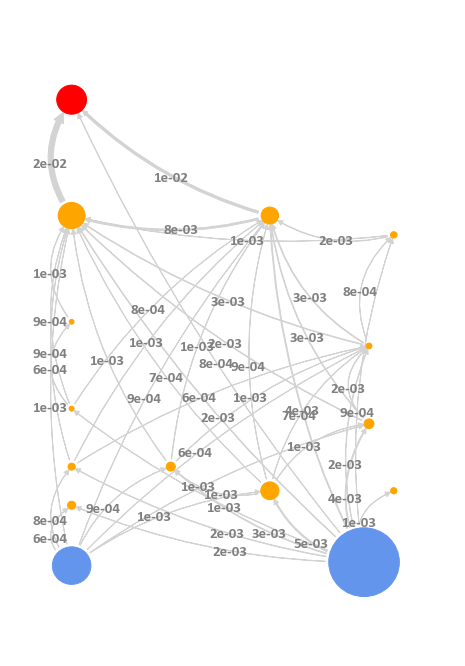

In [100]:
#import pyemma.plots as mplt
ax = plt.figure(figsize=(5.1, 4))
#ax = fig.add_subplot(111)
cmap = plt.cm.get_cmap("jet_r")
#CS = plt.contourf(xedges[1:],yedges[1:],H,levels = np.linspace(0,1000000,11),cmap=cmap,extend="max")
#lvls = np.logspace(0,3,15)
cmap.set_over("white")
ccc='orange'
color_list=['cornflowerblue','cornflowerblue',ccc,ccc,ccc,ccc,ccc,ccc,ccc,ccc,ccc,ccc,ccc,ccc,'red']
fig,_=plot_flux(cgflux, test_avgpos,cgflux.stationary_distribution,minflux=6*1e-4,max_width=12, max_height=12,state_scale=2.0,arrow_scale=2.0,flux_scale=10000,state_colors=color_list,show_committor=False)
#CS = plt.contourf(xedges[1:]*3,yedges[1:],Hn,levels = np.linspace(0,6.5,14),cmap=cmap,extend="max",alpha=0.5)
#cbar = plt.colorbar(CS)
#plt.scatter(data_ave[:,0],data_ave[:,1],s=18)
#plt.scatter(data_ave[:,0],data_ave[:,1],c=pcca,cmap='tab20c',s=14)
#plt.errorbar(data_ave[:,2],data_ave[:,0],xerr=data_ave[:,3],yerr=data_ave[:,1],fmt=None)
#plt.xlabel(r'RMSD (nm)',fontproperties=font_prop)
#plt.ylabel(r'Q',fontproperties=font_prop)
#plt.xlim(0,0.45)
#plt.ylim(0,1)
#leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
#leg.get_frame().set_linewidth(0.0)
#leg.get_frame().set_alpha(0.1)
#for label in (ax.get_xticklabels() + ax.get_yticklabels()+cbar.ax.get_yticklabels()):
#    label.set_fontproperties(font_prop)
#for label in cbar.ax.get_yticklabels():
#    label.set_fontproperties(leg_prop)
plt.savefig('/home/dongdong/SCR/msm_pdz/complex/kcenters_micro400lag400_2/flux_network2.png',dpi=600,bbox_inches='tight')
    #label.set_fontsize(16)
#plt.imshow(HH, interpolation='nearest', origin='low',extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],levels = np.linspace(1,6,20))
plt.show()


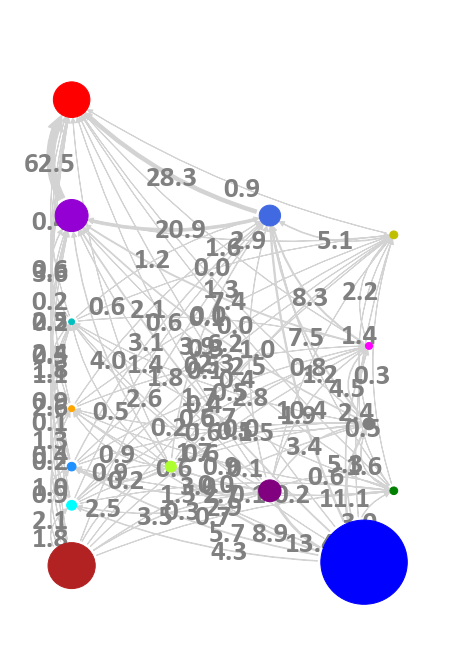

In [73]:
color_list2=['blue','firebrick','c','orange','magenta','green','y','greenyellow','grey','royalblue','purple','cyan','dodgerblue','darkviolet','red']
plot_network(Fsubpercent, pos=test_avgpos, state_sizes=cgflux.stationary_distribution, arrow_label_format="%3.1f",state_scale=3.0,arrow_scale=3.0,state_colors=color_list2)
plt.savefig('/home/dongdong/SCR/msm_pdz/complex/kcenters_micro400lag400_2/flux_network_100p.png',dpi=600,bbox_inches='tight')

In [121]:
allrate=np.zeros([15,15])
leg=[2,3,4,5,6,7,8,9,14,10,0,1,11,12,13]
for i in range(15):
    for j in range(15):
        if i!=j:
            temp_tpt=tpt(m400_mlh,all_idx[i],all_idx[j])
            allrate[leg[i]][leg[j]]=temp_tpt.rate*10000
            if leg[i]==0 or leg[i]==1:
                allrate[leg[i]][leg[j]]=temp_tpt.rate*10000*12/0.0392
            if (leg[i]==0 and leg[j]==1) or (leg[i]==1 and leg[j]==0):
                allrate[leg[i]][leg[j]]=temp_tpt.rate*10000

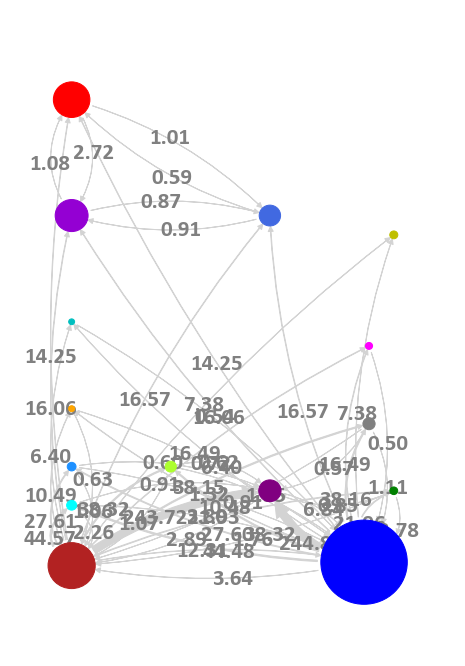

In [119]:
b=allrate
I, J = _np.where(b < 0.2)
b[I, J] = 0.0
color_list2=['blue','firebrick','c','orange','magenta','green','y','greenyellow','grey','royalblue','purple','cyan','dodgerblue','darkviolet','red']
plot_network(b, pos=test_avgpos, state_sizes=cgflux.stationary_distribution, arrow_label_format="%3.2f",state_scale=3.0,arrow_scale=3.0,state_colors=color_list2)
plt.savefig('/home/dongdong/SCR/msm_pdz/complex/kcenters_micro400lag400_2/rate.png',dpi=600,bbox_inches='tight')

In [120]:
b==allrate

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [ True,  True,  T

In [64]:
cgFub=cgflux.major_flux(fraction=1)

In [72]:
Fsubpercent = 100.0 * cgFub / cgflux.total_flux

In [83]:
cgflux.mfpt

214887.537358442

In [70]:
I, J = _np.where(Fsubpercent < 1.5)
Fsubpercent[I, J] = 0.0
Fsubpercent

array([[  0.        ,   0.        ,   0.        ,   2.86799221,
          5.30431676,   2.99603723,   2.41382057,   8.90409322,
         11.13208749,  10.41509054,  13.43396301,   4.32904121,
          5.71659744,   6.65423801,   2.28355877],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          1.71553304,   0.        ,   0.        ,   2.5237657 ,
          2.95818889,   2.55432712,   3.51377347,   1.75693934,
          2.13230249,   2.63294191,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   3.57721919,   0.        ],
       [  0.        ,   0.        ,   1.76165255,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   2.08180654,   0.        ,   0.        ,
          0.        ,   2.51301721,   0.        ],
       [  0.        ,   0.  

In [61]:
test=np.array([ 0.54246238*0.8,  0.16166861*0.85,  0.00256559*8,  0.00270432*8,  0.00369487*8,
        0.00445488*4,  0.00469875*4,  0.00908248*4,  0.01076674*4,  0.03317715*4,
        0.03620636*4,  0.00731829*4,  0.00562715*4,  0.07863081*2,  0.0969416*2 ])

In [54]:
avgpos

NameError: name 'avgpos' is not defined

## avgpos

In [62]:
test_avgpos=np.array([[ 0.79,  0.0021],
       [ 0.2,  -0.005],
       [ 0.2,  0.5],
       [ 0.2,  0.32],
       [ 0.8,  0.45],
       [ 0.85,  0.15],
       [ 0.85,  0.68],
       [ 0.4,  0.2 ],
       [ 0.8,  0.28873762],
       [ 0.6,  0.72],
       [ 0.6,  0.15],
       [ 0.2,  0.12],
       [ 0.2,  0.2],
       [ 0.2,  0.72],
       [ 0.2,  0.96]])

In [220]:
mplt.__file__

'/home/dongdong/software/anaconda3/envs/py3.6/lib/python3.6/site-packages/pyemma/plots/__init__.py'

In [121]:
pcca_edit=np.loadtxt('pcca_edit2.dat')
pcca_edit=pcca_edit.astype(int)

In [123]:
pcca_trj=[]
for ii in range(len(clustered_trajs)):
    temp=pcca_edit[clustered_trajs[ii]]
    pcca_trj.append(temp)
pcca_trj2=np.array(pcca_trj)

In [154]:
pcca_trj

[array([11, 11, 10, ..., 10, 11, 11]),
 array([10, 10, 10, ..., 10, 10, 10]),
 array([10, 10, 11, ..., 11, 11, 11]),
 array([11, 11, 11, ...,  8,  8,  8]),
 array([10, 10, 10, ..., 10, 10, 10]),
 array([10, 10, 10, ..., 10, 10, 10]),
 array([10, 10, 11, ..., 10, 10, 10]),
 array([10, 10, 10, ..., 10, 10, 10]),
 array([10, 10, 10, ..., 10, 10, 10]),
 array([10, 10, 10, ..., 11, 11, 11]),
 array([11, 10, 10, ..., 10, 10, 10]),
 array([11, 11, 11, ..., 10, 10, 10]),
 array([11, 10, 10, ...,  6,  6,  6]),
 array([10, 10,  9, ..., 10, 10, 10]),
 array([10, 10, 10, ..., 10, 10, 11]),
 array([10, 10, 11, ..., 10, 10, 10]),
 array([10, 10, 10, ..., 10, 10, 10]),
 array([10, 10, 10, ...,  1,  1,  1]),
 array([10, 11, 11, ...,  3, 10, 10]),
 array([ 9, 10, 12, ..., 11, 11, 11]),
 array([10, 10, 10, ..., 10, 10, 10]),
 array([10, 10, 10, ..., 10, 10, 10]),
 array([11, 11, 10, ..., 11, 10, 10]),
 array([11, 10, 10, ..., 10, 10, 10]),
 array([11, 11, 11, ..., 10, 10, 10]),
 array([10, 10, 10, ..., 

In [124]:
save_meta(pcca_trj,'pcca_trj_edit.pickl')

In [126]:
lg=400
MacroM=MarkovStateModel(lag_time=lg,reversible_type='mle', ergodic_cutoff='on',verbose=False)
MacroM.fit(pcca_trj)
lab_fix=MacroM.transform(pcca_trj,mode='fill')

In [128]:
lag_times = np.arange(1,2000,20)
n_timescales = 20
msm_timescales = implied_timescales(pcca_trj, lag_times, n_timescales=n_timescales, msm=MarkovStateModel(verbose=False), n_jobs = 1)


/home/dongdong/software/anaconda3/envs/py3.6/lib/python3.6/site-packages/progress_reporter/reporter.py:159: UserWarning: This should not happen. An caller pretended to have achieved more work than registered
  warnings.warn("This should not happen. An caller pretended to have "


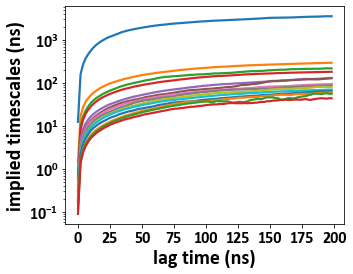

In [130]:
fig = plt.figure(figsize=(5,4))
sub = fig.add_subplot(1,1,1)
for i in range(14):
    plt.plot(lag_times*0.1, msm_timescales[:,i]*0.1,lw=2.2)
for label in (sub.get_xticklabels() + sub.get_yticklabels()):
    label.set_fontproperties(font_prop)
    label.set_fontsize(16)
plt.xlabel(r'lag time (ns)',fontproperties=font_prop)
plt.ylabel(r'implied timescales (ns)',fontproperties=font_prop)
#plt.ylim(1,10000)
plt.semilogy()
#pngname='impliedtimescales_kmedoids'+str(tlag)+'ncom'+str(ncom)+'c'+str(nc)
plt.savefig('Macro15.png',dpi=600,bbox_inches='tight')
plt.show()

In [131]:
save_meta(MacroM,'MacroM15.pickl')

In [86]:
lg=400
MacroM400=MarkovStateModel(lag_time=lg,reversible_type='mle', ergodic_cutoff='on',verbose=False)
MacroM400.fit(pcca_trj)

MarkovStateModel(ergodic_cutoff='on', lag_time=600, n_timescales=None,
                 prior_counts=0, reversible_type='mle', sliding_window=True,
                 verbose=False)

In [87]:
save_meta(MacroM600,'MacroM600.pickl')

In [58]:
import pyemma.msm as msm
msm_lag = 400
Macro400=msm.estimate_markov_model(pcca_trj, msm_lag)

In [111]:
pwd

'/scratch/gpfs/dongdong/msm_pdz/complex/kcenters_micro400lag400_2'

In [61]:
from pyemma.msm import tpt
tpt1=tpt(Macro400,[10],[8])

In [88]:
ck_macro = Macro400.cktest(9,mlags=4,n_jobs=16)

Box(children=(Text(value=''), IntProgress(value=0)))

In [138]:
1.853972574883455404e-01/6.224489991125766730e-01

0.2978513223616164

In [9]:
cd Macro15/

/scratch/gpfs/dongdong/msm_pdz/complex/kcenters_micro400lag400_2/Macro15


In [11]:
MacroM15=load_meta('MacroM15.pickl')

In [13]:
from msmbuilder.tpt import hub_scores

In [14]:
hubscore=hub_scores(MacroM15)

In [18]:
for hh in hubscore:
    print(hh)

0.122012794306
0.186425714219
0.270690081254
0.18839831512
0.118271838429
0.373874997857
0.38667840285
0.368597720583
0.257202863628
0.515189229568
0.687355573173
0.58615210758
0.280034041733
0.299518976085
0.359597343613


In [19]:
for mm in MacroM15.populations_:
    print(mm)

0.00296224168222
0.00305489132304
0.00402470849637
0.00509342955189
0.00425573819989
0.0102130509326
0.0121055670273
0.017256508541
0.0415525647154
0.0412677464545
0.622448999113
0.185397257488
0.00828880827026
0.00634920500381
0.0357292832008


In [17]:
hub_scores(MacroM15,10)

array([ 0.68735557])